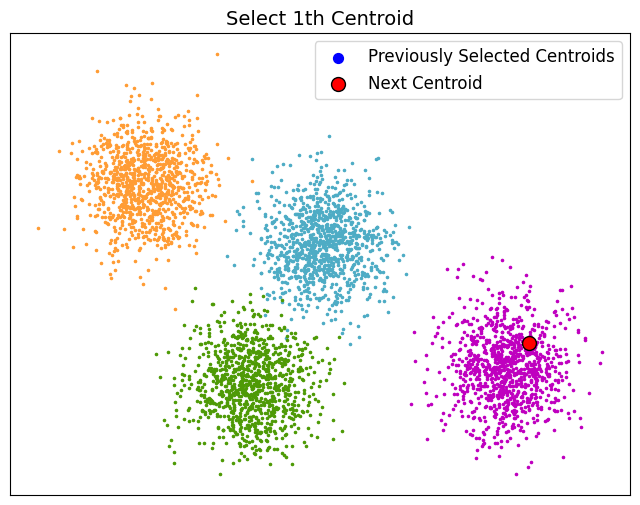

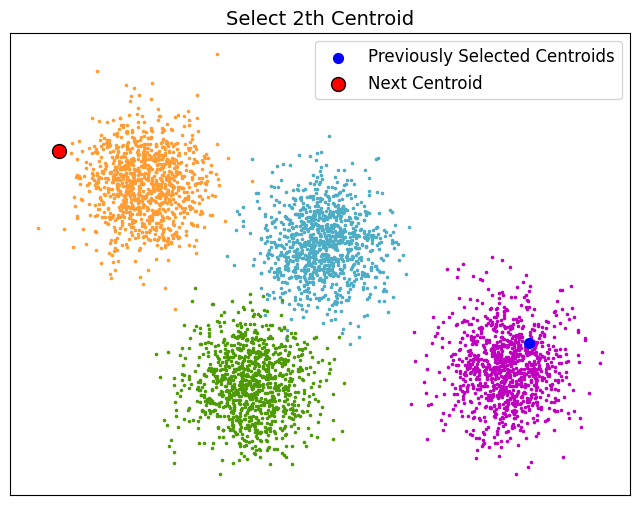

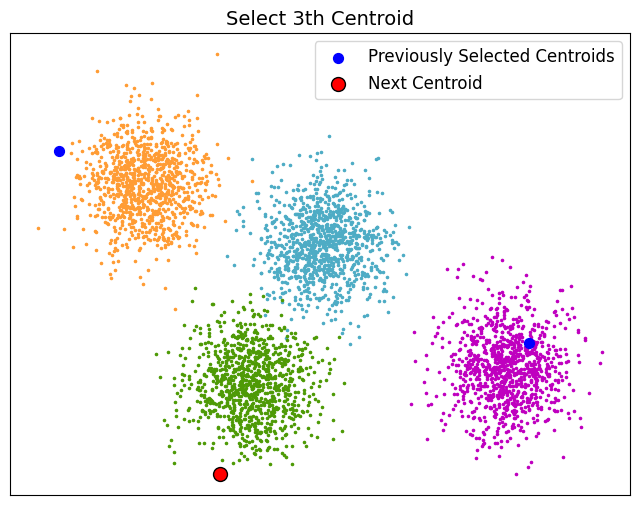

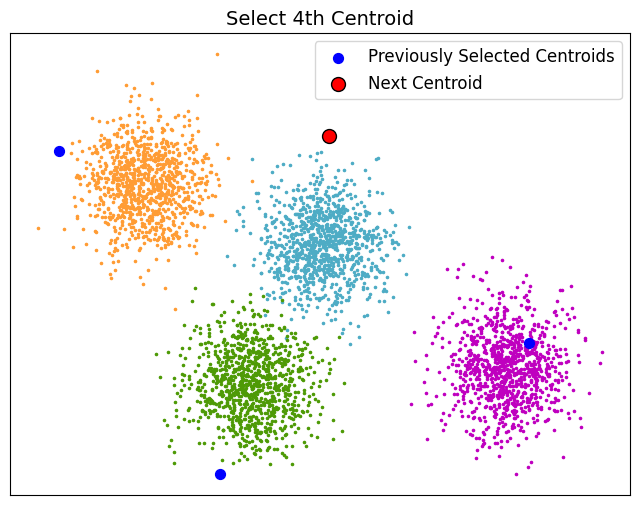

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

# Function to plot the selected centroids
def plot(data, y_true, centroids, step, colors):
    plt.figure(figsize=(8, 6))

    # Plot data points for each cluster
    for k, col in enumerate(colors):
        cluster_data = y_true == k
        plt.scatter(data[cluster_data, 0], data[cluster_data, 1], c=col, marker=".", s=10)

    # Plot centroids
    if len(centroids) > 0:
        plt.scatter(centroids[:-1, 0], centroids[:-1, 1], c="blue", s=50, label="Previously Selected Centroids")
        plt.scatter(centroids[-1, 0], centroids[-1, 1], c="red", s=100, label="Next Centroid", edgecolors="black")

    plt.title(f"Select {step + 1}th Centroid", fontsize=14)
    plt.xticks([])
    plt.yticks([])
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Function to compute Euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Initialization algorithm
def initialize(data, y_true, k, colors):
    '''
    Initializes the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (4000, 2)
        y_true - true labels of data points
        k - number of clusters
        colors - list of colors for each cluster
    '''
    # Initialize the centroids list and add a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0]), :])
    plot(data, y_true, np.array(centroids), 0, colors)

    # Compute remaining k - 1 centroids
    for c_id in range(k - 1):

        # Initialize a list to store distances of data points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = np.inf

            # Compute distance of 'point' from each of the previously selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        # Select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        plot(data, y_true, np.array(centroids), c_id + 1, colors)

    return centroids

# Define colors
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

# Call the initialize function to get the centroids
centroids = initialize(X, y_true, k=4, colors=colors)


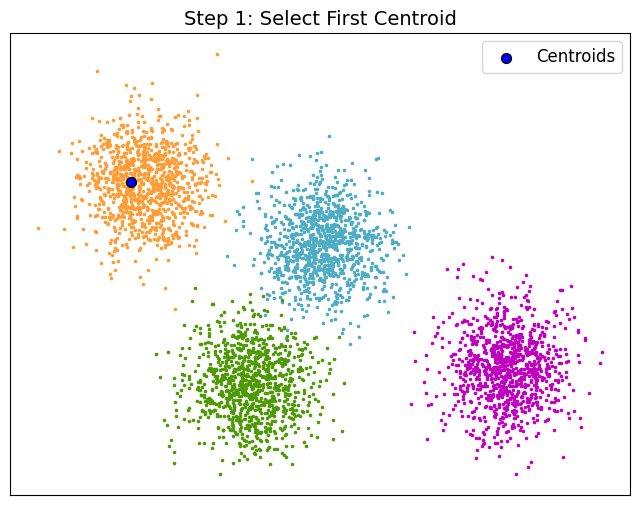

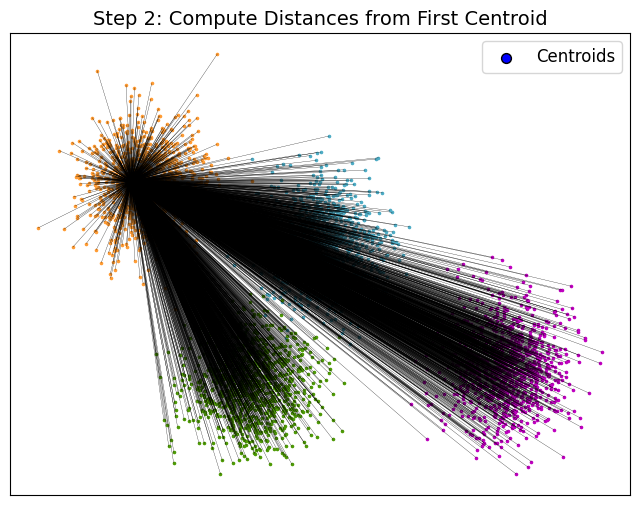

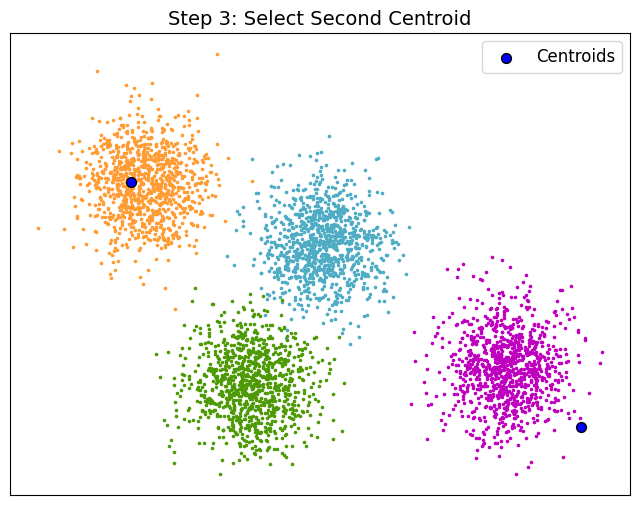

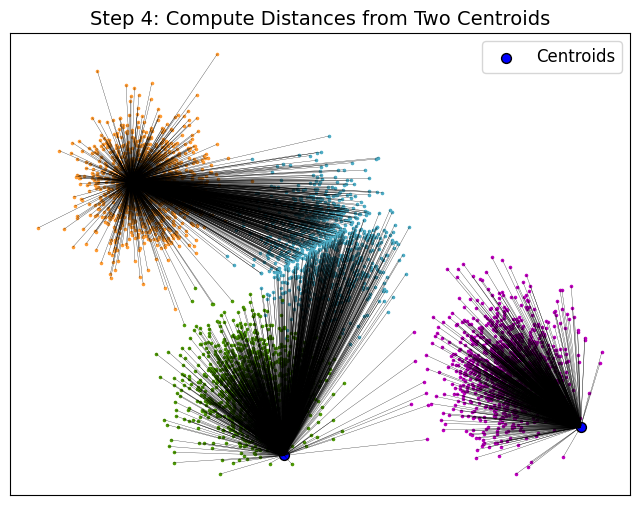

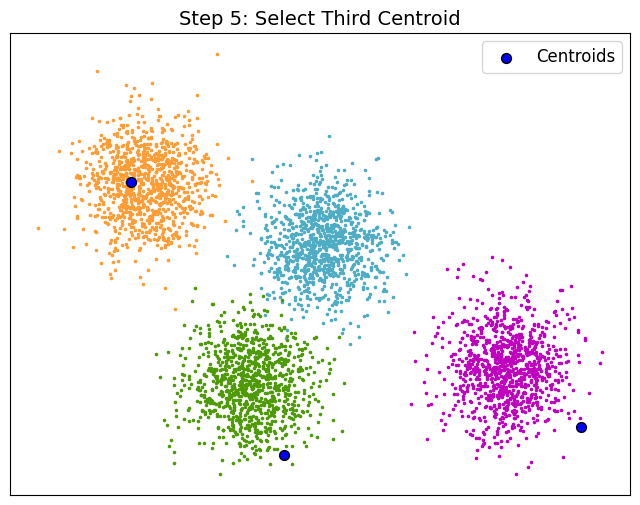

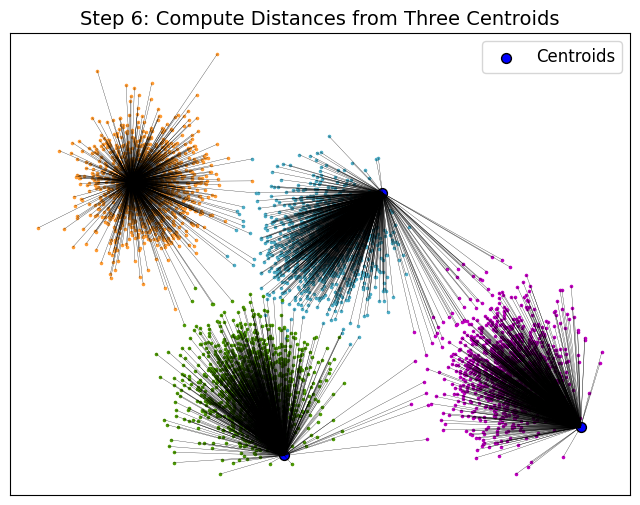

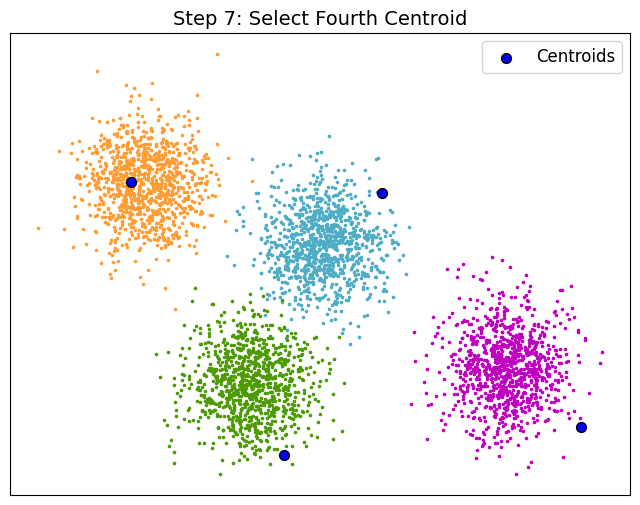

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

# Function to plot data points and centroids without lines
def plot_centroids(data, y_true, centroids, title, colors):
    plt.figure(figsize=(8, 6))
    for k, col in enumerate(colors):
        cluster_data = y_true == k
        plt.scatter(data[cluster_data, 0], data[cluster_data, 1], c=col, marker=".", s=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="blue", s=50, label="Centroids", edgecolors="black")
    plt.title(title, fontsize=14)
    plt.xticks([])
    plt.yticks([])
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Function to plot data points and centroids with lines
def plot_centroids_with_lines(data, y_true, centroids, title, colors):
    plt.figure(figsize=(8, 6))
    for k, col in enumerate(colors):
        cluster_data = y_true == k
        plt.scatter(data[cluster_data, 0], data[cluster_data, 1], c=col, marker=".", s=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="blue", s=50, label="Centroids", edgecolors="black")

    # Draw lines from each point to the nearest centroid
    for point in data:
        nearest_centroid = centroids[np.argmin([np.linalg.norm(point - centroid) for centroid in centroids])]
        plt.plot([point[0], nearest_centroid[0]], [point[1], nearest_centroid[1]], 'k-', lw=0.2)

    plt.title(title, fontsize=14)
    plt.xticks([])
    plt.yticks([])
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Function to compute Euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Initialization algorithm
def initialize(data, y_true, k, colors):
    # Initialize the centroids list and add a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0]), :])

    # Step 1: Randomly select the first centroid
    plot_centroids(data, y_true, np.array(centroids), "Step 1: Select First Centroid", colors)

    # Step 2: Compute distances from each data point to the first centroid
    plot_centroids_with_lines(data, y_true, np.array(centroids), "Step 2: Compute Distances from First Centroid", colors)

    # Compute remaining k - 1 centroids
    for c_id in range(k - 1):
        # Initialize a list to store distances of data points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = np.inf

            # Compute distance of 'point' from each of the previously selected centroids and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        # Select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)

        # Step 3: Select the next centroid
        if c_id == 0:
            plot_centroids(data, y_true, np.array(centroids), "Step 3: Select Second Centroid", colors)

        # Step 4: Compute distances from each data point to the centroids
        if c_id == 1:
            plot_centroids_with_lines(data, y_true, np.array(centroids), "Step 4: Compute Distances from Two Centroids", colors)

        # Step 5: Select the next centroid
        if c_id == 1:
            plot_centroids(data, y_true, np.array(centroids), "Step 5: Select Third Centroid", colors)

        # Step 6: Compute distances from each data point to the centroids
        if c_id == 2:
            plot_centroids_with_lines(data, y_true, np.array(centroids), "Step 6: Compute Distances from Three Centroids", colors)

    # Step 7: Select the fourth centroid
    plot_centroids(data, y_true, np.array(centroids), "Step 7: Select Fourth Centroid", colors)

# Define colors
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

# Call the initialize function to get the centroids
centroids = initialize(X, y_true, k=4, colors=colors)
